### Define Google Cloud project information

In [1]:
import google.auth

try:
    # google.auth.default() 會自動尋找環境中的憑證
    # 這就是所謂的 Application Default Credentials (ADC)
    credentials, project_id = google.auth.default()

    print("✅ 憑證讀取成功！")
    print(f"使用的憑證類型: {type(credentials).__name__}")
    
    # UserCredentials 通常代表你透過 `gcloud auth application-default login` 登入的帳號
    if hasattr(credentials, 'client_id'):
        print(f"用戶端 ID (Client ID): {credentials.client_id}")

    # 如果憑證有效，它應該會有一個 token
    if credentials.token:
        # 出於安全考量，我們只顯示 token 的一小部分或其存在性
        print("憑證 Token: [存在]")
    else:
        # 如果需要，可以手動刷新來獲取 token
        # from google.auth.transport.requests import Request
        # credentials.refresh(Request())
        # print("憑證 Token: [刷新後存在]")
        print("憑證 Token: [目前為空，執行操作時會自動刷新]")
        

    print(f"偵測到的專案 ID: {project_id}")
    if project_id is None:
        print("⚠️ 注意：未自動偵測到專案 ID。你可能需要在初始化服務時手動指定。")
        print("   (例如: vertexai.init(project='your-project-id', ...))")

except google.auth.exceptions.DefaultCredentialsError:
    print("❌ 錯誤：找不到預設憑證 (Application Default Credentials)。")
    print("請在終端機中執行 `gcloud auth application-default login` 來登入。")
except Exception as e:
    print(f"發生了未預期的錯誤: {e}")

✅ 憑證讀取成功！
使用的憑證類型: Credentials
憑證 Token: [目前為空，執行操作時會自動刷新]
偵測到的專案 ID: gen-lang-client-0570552573


In [2]:
import os
import google.auth

try:
    # 檢查 GOOGLE_APPLICATION_CREDENTIALS 環境變數是否被設定
    sa_key_path = os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')

    if sa_key_path:
        print("✅ 偵測到 GOOGLE_APPLICATION_CREDENTIALS 環境變數。")
        print(f"   金鑰檔案路徑: {sa_key_path}")
        print("---")
        print("身份判定：服務帳戶 (Service Account)")
        
        # 從金鑰檔案載入憑證並顯示服務帳戶信箱
        credentials, project_id = google.auth.load_credentials_from_file(sa_key_path)
        if hasattr(credentials, 'service_account_email'):
            print(f"服務帳戶 Email: {credentials.service_account_email}")
        print(f"金鑰檔案內建的專案 ID: {project_id}")

    else:
        print("ℹ️ 未偵測到 GOOGLE_APPLICATION_CREDENTIALS 環境變數。")
        print("   系統將嘗試使用 gcloud 使用者憑證。")
        print("---")
        print("身份判定：個人使用者帳戶 (User Account)")
        
        # 尋找預設的使用者憑證
        credentials, project_id = google.auth.default()
        # 'authorized_user' 類型的憑證通常代表個人帳戶
        if credentials.token:
             # 在 gcloud auth application-default print-access-token 的輸出中可以找到email
             # 但 credentials 物件本身不直接暴露 email，我們可以檢查 quota_project_id
             if hasattr(credentials, 'quota_project_id'):
                  print(f"憑證關聯的 Quota Project ID: {credentials.quota_project_id}")
             print("此憑證來自 'gcloud auth application-default login'。")


except google.auth.exceptions.DefaultCredentialsError:
    print("❌ 錯誤：找不到任何有效的憑證。")
    print("請執行 'gcloud auth application-default login' 或設定 'GOOGLE_APPLICATION_CREDENTIALS'。")
except Exception as e:
    print(f"發生了未預期的錯誤: {e}")

✅ 偵測到 GOOGLE_APPLICATION_CREDENTIALS 環境變數。
   金鑰檔案路徑: C:\Users\ZieWeiXie\Desktop\1132\Financial Management\Final\English\gen-lang-client-0570552573-ed41756955d5.json
---
身份判定：服務帳戶 (Service Account)
服務帳戶 Email: multirag@gen-lang-client-0570552573.iam.gserviceaccount.com
金鑰檔案內建的專案 ID: gen-lang-client-0570552573


In [3]:
import os
import shutil

# --- 步驟 1: 打印出 Python Kernel 所能看到的 PATH 環境變數 ---
print("--- Python Kernel's PATH ---")
path_var = os.environ.get('PATH', '')
for p in path_var.split(os.pathsep):
    print(p)

# --- 步驟 2: 使用 Python 的方式直接檢查 'gcloud' 指令是否存在 ---
print("\n--- Checking for 'gcloud' command ---")
gcloud_path = shutil.which('gcloud')

if gcloud_path:
    print(f"✅ 'gcloud' 指令已找到，路徑為: {gcloud_path}")
else:
    print("❌ 錯誤: Python Kernel 的 PATH 中找不到 'gcloud' 指令。")

--- Python Kernel's PATH ---
c:\Users\ZieWeiXie\anaconda3\envs\MultiRAG
C:\Users\ZieWeiXie\anaconda3\envs\MultiRAG
C:\Users\ZieWeiXie\anaconda3\envs\MultiRAG\Library\mingw-w64\bin
C:\Users\ZieWeiXie\anaconda3\envs\MultiRAG\Library\usr\bin
C:\Users\ZieWeiXie\anaconda3\envs\MultiRAG\Library\bin
C:\Users\ZieWeiXie\anaconda3\envs\MultiRAG\Scripts
C:\Users\ZieWeiXie\anaconda3\envs\MultiRAG\bin
C:\Users\ZieWeiXie\anaconda3\condabin
C:\Users\ZieWeiXie\AppData\Local\Programs\Python\Python311
C:\Users\ZieWeiXie\AppData\Local\Programs\Python\Python311\Scripts
C:\Users\ZieWeiXie\AppData\Local\Programs\Python\Python36
C:\Users\ZieWeiXie\AppData\Local\Programs\Python\Python36\Scripts
C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v8.0\bin
C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v8.0\libnvvp
C:\Program Files\Common Files\Oracle\Java\javapath
C:\Windows\system32
C:\Windows
C:\Windows\System32\Wbem
C:\Windows\System32\WindowsPowerShell\v1.0
C:\Windows\System32\OpenSSH
C:\Program Files (

### Define Google Cloud project information


In [4]:
# Define project information

import sys

PROJECT_ID = "gen-lang-client-0570552573"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# if not running on colab, try to get the PROJECT_ID automatically
# GCLOUD_PATH = r"C:\Program Files (x86)\Google\Cloud SDK\google-cloud-sdk\bin\gcloud.CMD"
# if "google.colab" not in sys.modules:
#     import subprocess

#     PROJECT_ID = subprocess.check_output(
#         [GCLOUD_PATH, "config", "get-value", "project"],
#     ).strip()

print(f"Your project ID is: {PROJECT_ID}")

Your project ID is: gen-lang-client-0570552573


In [5]:
import sys

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Import libraries


In [6]:
from rich import print as rich_print
from rich.markdown import Markdown as rich_Markdown
from IPython.display import Markdown, display
from vertexai.generative_models import (
    Content,
    GenerationConfig,
    GenerationResponse,
    GenerativeModel,
    HarmCategory,
    HarmBlockThreshold,
    Image,
    Part,
)
from vertexai.language_models import TextEmbeddingModel
from vertexai.vision_models import MultiModalEmbeddingModel

In [7]:
# Multimodal models: Choose based on your performance/cost needs

multimodal_model_2_0_flash = GenerativeModel(
    "gemini-2.0-flash-001"
) # Gemini latest Gemini 2.0 Flash Model

multimodal_model_15 = GenerativeModel(
    "gemini-2.0-flash-001"
)  # works with text, code, images, video(with or without audio) and audio(mp3) with 1M input context - complex reasoning

# Multimodal models: Choose based on your performance/cost needs
multimodal_model_15_flash = GenerativeModel(
    "gemini-2.0-flash-001"
)  # works with text, code, images, video(with or without audio) and audio(mp3) with 1M input context - faster inference

# Load text embedding model from pre-trained source
text_embedding_model = TextEmbeddingModel.from_pretrained("text-embedding-005")

# Load multimodal embedding model from pre-trained source
multimodal_embedding_model = MultiModalEmbeddingModel.from_pretrained(
    "multimodalembedding@001"
)  # works with image, image with caption(~32 words), video, video with caption(~32 words)

#### Get documents and images from GCS

In [8]:
# # download documents and images used in this notebook - will take ~30 sec
# !gsutil -m -q rsync -r gs://github-repo/rag/intro_multimodal_rag/intro_multimodal_rag_v2 .
# print("Download completed")

## Building metadata of documents containing text and images

### Import helper functions to build metadata

Before building the Multimodal Question Answering System with Vertex AI, it's important to have metadata of all the text and images in the document. For references and citations purposes, the metadata should contain essential elements, including page number, file name, image counter, and so on. Hence, as a next step, you will generate embeddings from the metadata, which is required to perform similarity search when querying the data.

In [9]:
from multimodal_qa_with_rag_utils import (
    get_document_metadata,
    set_global_variable,
)

set_global_variable("text_embedding_model", text_embedding_model)
set_global_variable("multimodal_embedding_model", multimodal_embedding_model)

**NOTE: Given that we are loading 4 files with roughly 200 pages and approximately 84 images, the cell below will take approximately 7 minutes to run. We recommend loading pre-computed metadata instead.**

In [10]:
%%time
# Specify the PDF folder with multiple PDF ~7m

print("Removing pre-exsisting images folder, since you are running the logic from scratch")
! rm -rf images/

pdf_folder_path = "data/"  # if running in Vertex AI Workbench.

# Specify the image description prompt. Change it
# image_description_prompt = """Explain what is going on in the image.
# If it's a table, extract all elements of the table.
# If it's a graph, explain the findings in the graph.
# Do not include any numbers that are not mentioned in the image.
# """

image_description_prompt = """您是一位技術圖像分析專家。我們將提供給您從研究論文、技術部落格等文件中擷取的各種類型圖像。
您的任務是針對這些圖像生成簡潔、準確的描述，並且不添加任何您不確定的資訊。
請專注於捕捉圖像中所描繪的關鍵細節、趨勢或關係。

重要原則：
準確性優先： 如果您對任何細節不確定，請註明為「未知」或「不可見」，而非猜測。
避免產生幻覺： 請勿添加圖像未直接支持的資訊。
具體明確： 使用精確的語言來描述所描繪的形狀、顏色、紋理及任何互動關係。
考量上下文： 如果圖像為螢幕截圖或包含文字，請將該資訊整合至您的描述中。
"""

# Extract text and image metadata from the PDF document
text_metadata_df, image_metadata_df = get_document_metadata(
    multimodal_model_2_0_flash,  # we are passing gemini 2.0 Flash Model
    pdf_folder_path,
    image_save_dir="images",
    image_description_prompt=image_description_prompt,
    embedding_size=1408,
    # add_sleep_after_page = True, # Uncomment this if you are running into API quota issues
    # sleep_time_after_page = 5,
    add_sleep_after_document=True,  # Uncomment this if you are running into API quota issues
    sleep_time_after_document=5,    # Increase the value in seconds, if you are still getting quota issues. It will slow down the processing.
    # generation_config = # see next cell
    # safety_settings =  # see next cell
)

print("\n\n --- Completed processing. ---")


Removing pre-exsisting images folder, since you are running the logic from scratch


 Processing the file: --------------------------------- data\TSMC.pdf 


Processing page: 1


'rm' ���O�����Υ~���R�O�B�i���檺�{���Χ妸�ɡC


Processing page: 2
Extracting image from page: 2, saved as: images\TSMC.pdf_image_1_0_33.png
Extracting image from page: 2, saved as: images\TSMC.pdf_image_1_1_34.png
Extracting image from page: 2, saved as: images\TSMC.pdf_image_1_2_35.png
Extracting image from page: 2, saved as: images\TSMC.pdf_image_1_3_36.png
Extracting image from page: 2, saved as: images\TSMC.pdf_image_1_4_37.png
Processing page: 3
Extracting image from page: 3, saved as: images\TSMC.pdf_image_2_0_40.png
Extracting image from page: 3, saved as: images\TSMC.pdf_image_2_1_41.png

 
 Sleeping for  5  sec before processing the next document to avoid quota issues. You can disable it: "add_sleep_after_document = False"  


 --- Completed processing. ---
CPU times: total: 641 ms
Wall time: 37.8 s


If you would like to pass additional parameters to Gemini while building metadata, here are some options:

In [11]:
# # Parameters for Gemini API call.
# # reference for parameters: https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/gemini

# generation_config=  GenerationConfig(temperature=0.2, max_output_tokens=2048)

# # Set the safety settings if Gemini is blocking your content or you are facing "ValueError("Content has no parts")" error or "Exception occured" in your data.
# # ref for settings and thresholds: https://cloud.google.com/vertex-ai/docs/generative-ai/multimodal/configure-safety-attributes

# safety_settings = {
#                   HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
#                   HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
#                   HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
#                   HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
#                   }

# # You can also pass parameters and safety_setting to "get_gemini_response" function

### Load pre-computed metadata of text and images from source document

**If you are facing constant issues with Quota or want to focus on the outputs, you should load pre-computed metadata.**

In [12]:
# # [Optional]
# import pickle

# # Load the pickle file
# with open("mrag_metadata.pkl", "rb") as f:
#     data = pickle.load(f)

# # Extract the DataFrames
# text_metadata_df = data["text_metadata"]
# image_metadata_df = data["image_metadata"]

#### Inspect the processed text metadata


The following cell will produce a metadata table which describes the different parts of text metadata, including:

- **text**: the original text from the page
- **text_embedding_page**: the embedding of the original text from the page
- **chunk_text**: the original text divided into smaller chunks
- **chunk_number**: the index of each text chunk
- **text_embedding_chunk**: the embedding of each text chunk

In [13]:
text_metadata_df.head()

,file_name,page_num,text,text_embedding_page,chunk_number,chunk_text,text_embedding_chunk
0,data\TSMC.pdf,1,重要訊息: 我們認為台積電 2025 年成長動能將保持強勁，並預期營收將繼 2024 年大幅...,"[-0.06303978711366653, -0.006351870484650135, ...",1,重要訊息: 我們認為台積電 2025 年成長動能將保持強勁，並預期營收將繼 2024 年大幅...,"[-0.06411252170801163, -0.005988811142742634, ..."
1,data\TSMC.pdf,1,重要訊息: 我們認為台積電 2025 年成長動能將保持強勁，並預期營收將繼 2024 年大幅...,"[-0.06303978711366653, -0.006351870484650135, ...",2,業的投資首選。儘管地緣政治緊張情勢升高可能導致股價 波\n動，但不會改變台積電在先進製程的技...,"[-0.042035914957523346, -0.049619149416685104,..."
2,data\TSMC.pdf,2,25 倍計算而得。 \n投資風險: 全球經濟與地緣政治不確定性；庫存修正時間延長。 \n \...,"[-0.009128344245254993, -0.02665082924067974, ...",1,25 倍計算而得。 \n投資風險: 全球經濟與地緣政治不確定性；庫存修正時間延長。 \n \...,"[-0.009128344245254993, -0.02665082924067974, ..."
3,data\TSMC.pdf,3,\n \n,"[-0.05412939563393593, -0.0007017888128757477,...",1,\n \n,"[-0.05412939563393593, -0.0007017888128757477,..."


#### Inspect the processed image metadata

The following cell will produce a metadata table which describes the different parts of image metadata, including:
* **img_desc**: Gemini-generated textual description of the image.
* **mm_embedding_from_text_desc_and_img**: Combined embedding of image and its description, capturing both visual and textual information.
* **mm_embedding_from_img_only**: Image embedding without description, for comparison with description-based analysis.
* **text_embedding_from_image_description**: Separate text embedding of the generated description, enabling textual analysis and comparison.

In [14]:
image_metadata_df.head()

,file_name,page_num,img_num,img_path,img_desc,mm_embedding_from_img_only,text_embedding_from_image_description
0,data\TSMC.pdf,2,1,images\TSMC.pdf_image_1_0_33.png,該圖像是一個堆疊條形圖，標題為「圖2：台積電各製程晶圓營收比重」。\nY軸標示為「營收製程別...,"[0.0173197687, -0.0144308759, 0.00649443315, 0...","[-0.009956919588148594, 0.02809711918234825, 0..."
1,data\TSMC.pdf,2,2,images\TSMC.pdf_image_1_1_34.png,該圖像是一個柱狀圖，標題為「圖 3：季營業收入」，顯示了以百萬元為單位的季營業收入。x 軸表...,"[0.0535165071, 0.026549967, -0.0216739178, 0.0...","[-0.03386767953634262, -0.027403196319937706, ..."
2,data\TSMC.pdf,2,3,images\TSMC.pdf_image_1_2_35.png,以下是圖像的描述：\n該圖表顯示了每股盈利，以元為單位，從 1Q23 到 4Q25F 的季度...,"[0.0316860303, 0.00646685949, 0.00132166489, 0...","[-0.03636539354920387, -0.0041497801430523396,..."
3,data\TSMC.pdf,2,4,images\TSMC.pdf_image_1_3_36.png,這是一張折線圖，標題為「圖 5：毛利率」。y 軸標示為「毛利率，百分比」，範圍從 50.0%...,"[0.0418519862, -0.00135696889, -0.0251900852, ...","[-0.04031166434288025, -0.00011414965410949662..."
4,data\TSMC.pdf,2,5,images\TSMC.pdf_image_1_4_37.png,這是一張圖表，標題為「圖 6：未來 12 個月預估本益比」。圖表顯示了從 2019 年 11...,"[0.00857849512, 0.0329951271, 0.0142494747, -0...","[-0.020930657163262367, 0.0066296979784965515,..."


### Import the helper functions to implement RAG

You will be importing the following functions which will be used in the remainder of this notebook to implement RAG:

* **get_similar_text_from_query():** Given a text query, finds text from the document which are relevant, using cosine similarity algorithm. It uses text embeddings from the metadata to compute and the results can be filtered by top score, page/chunk number, or embedding size.
* **print_text_to_text_citation():** Prints the source (citation) and details of the retrieved text from the `get_similar_text_from_query()` function.
* **get_similar_image_from_query():** Given an image path or an image, finds images from the document which are relevant. It uses image embeddings from the metadata.
* **print_text_to_image_citation():** Prints the source (citation) and the details of retrieved images from the `get_similar_image_from_query()` function.
* **get_gemini_response():** Interacts with a Gemini model to answer questions based on a combination of text and image inputs.
* **display_images():**  Displays a series of images provided as paths or PIL Image objects.

In [15]:
from multimodal_qa_with_rag_utils import (
    get_similar_text_from_query,
    print_text_to_text_citation,
    get_similar_image_from_query,
    print_text_to_image_citation,
    get_gemini_response,
    display_images,
    get_answer_from_qa_system,
)

Before implementing a Multimodal Question Answering System with Vertex AI, let's explore what you can achieve with just text or image embeddings. This will set the foundation for implementing a multimodal Retrieval Augmented Generation (RAG) system, which you will do later in this notebook.

You can also use these essential elements together to build applications for multimodal use cases, extracting meaningful information from documents.

## Text Search

Let's start the search with a simple question and see if the simple text search using text embeddings can answer it. The expected answer is to show the value of basic and diluted net income per share of Google for different share types.


In [16]:
query = "該報告中，台積電每一季的營業利潤率為何?"

### Search similar text with text query

In [17]:
# Matching user text query with "chunk_embedding" to find relevant chunks.
matching_results_text = get_similar_text_from_query(
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=3,
    chunk_text=True,
)

# Print the matched text citations
print_text_to_text_citation(
    matching_results_text, print_top=True, chunk_text=True
)  # print_top=False to see all text matches

Citation 1: Matched text: 

score:  0.72
file_name:  data\TSMC.pdf
page_number:  2
chunk_number:  1
chunk_text:  25 倍計算而得。 
投資風險: 全球經濟與地緣政治不確定性；庫存修正時間延長。 
 
 
 
 
 
 



### Get answer with text-RAG

In [18]:
# All relevant text chunk found across documents based on user query
context = "\n".join(
    [value["chunk_text"] for key, value in matching_results_text.items()]
)

prompt = f"""回答這個問題，如果不知道就說不知道".
問題: {query}
上下文: {context}
回覆:
"""

In [19]:
safety_settings = {
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
}

In [20]:
%%time
# Generate response with Gemini 2.0 Flash
print("\n **** Result: ***** \n")

rich_Markdown(
    get_gemini_response(
        multimodal_model_2_0_flash,
        model_input=prompt,
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
    )
)


 **** Result: ***** 

CPU times: total: 15.6 ms
Wall time: 600 ms


不知道。該報告中沒有提到台積電每一季的營業利潤率。

### Search similar images with text query

Since plain text search and RAG didn't provide the detailed answer and the information may be visually represented in a table or another image format, you can use multimodal capability of Gemini 2.0 Flash for the similar task.

The goal here also is to find an image similar to the text query. You may also print the citations to verify.

In [21]:
query = "該報告中，台積電每一季的營業利潤率為何?"


 **** Result: ***** 



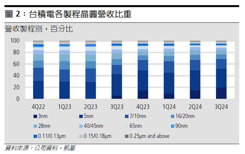

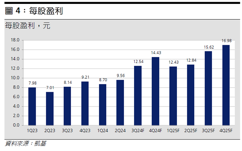

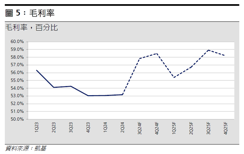

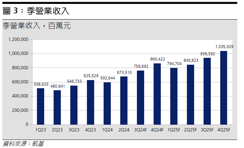

In [22]:
matching_results_image = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query=query,
    column_name="text_embedding_from_image_description",  # Use image description text embedding
    image_emb=False,  # Use text embedding instead of image embedding
    top_n=5,
    embedding_size=1408,
)

# Markdown(print_text_to_image_citation(matching_results_image, print_top=True))
print("\n **** Result: ***** \n")

# Display the top matching image
display_images(
    [
        matching_results_image[0]["img_path"],
        matching_results_image[1]["img_path"],
        matching_results_image[2]["img_path"],
        matching_results_image[3]["img_path"],
    ],
    resize_ratio=0.3,
)

In [23]:
%%time

print("\n **** Result: ***** \n")

instruction = f"""Answer the question and explain results with the given Image:
Question: {query}
Image:
"""

# Prepare the model input
model_input = [
    instruction,
    # passing all matched images to Gemini
    "Image:",
    matching_results_image[0]["image_object"],
    "Description:",
    matching_results_image[0]["image_description"],
    "Image:",
    matching_results_image[1]["image_object"],
    "Description:",
    matching_results_image[1]["image_description"],
    "Image:",
    matching_results_image[2]["image_object"],
    "Description:",
    matching_results_image[2]["image_description"],
    "Image:",
    matching_results_image[3]["image_object"],
    "Description:",
    matching_results_image[3]["image_description"],
]

# Generate Gemini response with streaming output
rich_Markdown(
    get_gemini_response(
        multimodal_model_2_0_flash,
        model_input=model_input,
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
    )
)


 **** Result: ***** 

CPU times: total: 62.5 ms
Wall time: 2.64 s


為了計算台積電每季的營業利潤率，我們需要以下資訊：                                                                 

 • 毛利率 (Gross Margin): 圖像 5 提供了毛利率，以百分比表示。                                                      
 • 營業收入 (Operating Revenue): 圖像 3 提供了季營業收入，以百萬元為單位。                                         

營業利潤率的計算公式：                                                                                             

營業利潤率 = (營業利潤 / 營業收入) * 100%                                                                          

 • 營業利潤:  (毛利率 * 營業收入) - 銷售成本 毛利率的計算公式是 (營業收入 - 銷售成本) / 營業收入。 因此 (毛利率 *  
   營業收入) = 營業收入 - 銷售成本                                                                                 

由於我沒有銷售成本的資料， 我沒有辦法計算出實際的營業利潤率。

In [24]:
## you can check the citations to probe further.
## check the "image description:" which is a description extracted through gemini which helped search our query.
rich_print(print_text_to_image_citation(matching_results_image, print_top=True))

Citation 1: Matched image path, page number and page text: 

score:  0.66
file_name:  data\TSMC.pdf
path:  images\TSMC.pdf_image_1_0_33.png
page number:  2
page text:  25 倍計算而得。 
投資風險: 全球經濟與地緣政治不確定性；庫存修正時間延長。 
 
 
 
 
 
 

image description:  該圖像是一個堆疊條形圖，標題為「圖2：台積電各製程晶圓營收比重」。
Y軸標示為「營收製程別，百分比」，範圍從0到100，間隔為20。
X軸代表季度，從4Q22到3Q24。
每個條形代表一個季度，並被分割成多個部分，每個部分代表不同的製程節點，包括3nm、5nm、7/10nm、16/20nm、28nm、40/45nm、65nm、90nm、0.11/0.13µm、0.15/0.18µm和0.25µm及以上。
圖例位於圖表下方，將每種製程節點與一種顏色相關聯。
圖表下方註明「資料來源：公司資料，凱基」。


None

## Image Search

### Search similar image with image input [using multimodal image embeddings]

Imagine searching for images, but instead of typing words, you use an actual image as the clue.

Think of it like searching with a mini-map instead of a written address.
It's a different way to ask, "Show me more stuff like this".

So, instead of typing "various example of gemini 1.5 long context", you show a picture of that image and say, "Find me more like this"

For demonstration purposes, we will only be finding similar images that show the various features of Gemini in a single document below. However, you can scale this design pattern to match (find relevant images) across multiple documents.

In [ ]:
# You can find a similar image as per the images you have in the metadata.

image_query_path = "images/gemini_v1_5_report_technical.pdf_image_5_0_148.jpeg"

# Print a message indicating the input image
print("***Input image from user:***")

# Display the input image
Image.load_from_file(image_query_path)

You expect to find images that are similar in terms of "long context prompts for gemini 1.5 pro"

In [ ]:
# Search for Similar Images Based on Input Image and Image Embedding

matching_results_image = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query=query,  # Use query text for additional filtering (optional)
    column_name="mm_embedding_from_img_only",  # Use image embedding for similarity calculation
    image_emb=True,
    image_query_path=image_query_path,  # Use input image for similarity calculation
    top_n=3,  # Retrieve top 3 matching images
    embedding_size=1408,  # Use embedding size of 1408
)

print("\n **** Result: ***** \n")

# Display the Top Matching Image
display(
    matching_results_image[0]["image_object"]
)  # Display the top matching image object (Pillow Image)


You can also print the citation to see what it has matched.

In [ ]:
# Display citation details for the top matching image
print_text_to_image_citation(
    matching_results_image, print_top=True
)  # Print citation details for the top matching image

In [ ]:
# Check Other Matched Images (Optional)
# You can access the other two matched images using:

print("---------------Matched Images------------------\n")
display_images(
    [
        matching_results_image[0]["img_path"],
        matching_results_image[1]["img_path"],
        matching_results_image[2]["img_path"],
    ],
    resize_ratio=0.2,
)

The ability to identify similar text and images based on user input, powered by Gemini and embeddings, forms a crucial foundation for development of Multimodal Question Answering System with multimodal RAG design pattern, which you will explore in the coming sections.

### Comparative reasoning

Next, let's apply what you have done so far in doing comparative reasoning.

For this example:

* **Step 1:** You will search all the images for a specific query

* **Step 2:** Send those images to Gemini 2.0 Flash to ask multiple questions, where it has to compare among those images and provide you with answers.

In [ ]:
matching_results_image_query_1 = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query="Show me all the images that can describe stock performance of Intel",
    column_name="text_embedding_from_image_description",  # Use image description text embedding # mm_embedding_from_img_only text_embedding_from_image_description
    image_emb=False,  # Use text embedding instead of image embedding
    top_n=5,
    embedding_size=1408,
)

In [ ]:
# Check Matched Images
# You can access the other two matched images using:

print("---------------Matched Images------------------\n")
display_images(
    [
        matching_results_image_query_1[0]["img_path"],
        matching_results_image_query_1[1]["img_path"],
        matching_results_image_query_1[2]["img_path"],
        matching_results_image_query_1[3]["img_path"],
        matching_results_image_query_1[4]["img_path"],
    ],
    resize_ratio=0.2,
)

In [ ]:
prompt = f"""Task: Answer the following questions in detail, providing clear reasoning and evidence from the images in bullet points.
Instructions:
1. Analyze the provided images focusing on the relationship between TPU v5e scaling efficiency, LLM model size growth, performance metrics, and quantization effects.
2. Answer the following questions in detail, providing clear reasoning and evidence from the images in bullet points
3. Cite the image sources to support your explanations. Mention the file name.

Additional Considerations:
* Clearly define any technical terms (e.g., EMFU, TFLOP/chip/s) within your answers for better understanding.
* Use specific examples and data points from the images to support your explanations.
* Feel free to request additional information or clarification if the images are unclear or ambiguous.

Question:
 - How does the scaling efficiency of TPU v5e compare to the overall growth in LLM model size over time?
 - How does the model size impact the observed Per-chip performance and EMFU for a fixed number of TPU v5e chips (e.g., 256)?
 - For the INT8 Quant training with 32B parameters, how does its high EMFU relate to the observed TFLOP/chip/s?
 - how does the "per device batch (seq)" for a 16B model compare to a 128B model, and how does this affect the "Total observed Perf"?
 - how might the MFU be impacted by increasing LLM model size?
"""

In [ ]:
%%time
# Generate response with Gemini 2.0 Flash
print("\n **** Result: ***** \n")
rich_Markdown(
    get_gemini_response(
        multimodal_model_2_0_flash,
        model_input=[
            prompt,
            "Images:",
            matching_results_image_query_1[0]["image_object"],
            matching_results_image_query_1[1]["image_object"],
            matching_results_image_query_1[2]["image_object"],
            matching_results_image_query_1[3]["image_object"],
            matching_results_image_query_1[4]["image_object"],
        ],
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
    )
)

## Building Multimodal QA System with retrieval augmented generation (mRAG)

Let's bring everything together to implement multimodal RAG. You will use all the elements that you've explored in previous sections to implement the multimodal RAG. These are the steps:

* **Step 1:** The user gives a query in text format where the expected information is available in the document and is embedded in images and text.
* **Step 2:** Find all text chunks from the pages in the documents using a method similar to the one you explored in `Text Search`.
* **Step 3:** Find all similar images from the pages based on the user query matched with `image_description` using a method identical to the one you explored in `Image Search`.
* **Step 4:** Combine all similar text and images found in steps 2 and 3 as `context_text` and `context_images`.
* **Step 5:** With the help of Gemini, we can pass the user query with text and image context found in steps 2 & 3. You can also add a specific instruction the model should remember while answering the user query.
* **Step 6:** Gemini produces the answer, and you can print the citations to check all relevant text and images used to address the query.

### Step 1: User query

In [25]:
# this time we are not passing any images, but just a simple text query.

query = """- 台積電的先進製程（此處定義為7奈米及更先進製程）在2023年第四季的合併營收佔比約為多少？這個佔比在2024年第三季預計將如何變化？
 - 請計算從2024年第三季（3Q24F）到2025年第四季（4Q25F），預測的營收季複合增長率（Quarterly Compound Growth Rate）約為多少？
 - 台積電在2025年哪一個季度的每股盈利（EPS）將首次超越2023年的最高點？與2023年全年的平均單季EPS相比，2025年預測的平均單季EPS預計將增長多少百分比？
 - 毛利率的走勢從2024年第二季開始轉為預測（虛線）。請問從2023年第一季至2025年第四季（含預測），毛利率的最高點與最低點分別出現在哪個季度？兩者相差多少個百分點？
 - 在2022年底至2023年初，台積電的股價（藍色曲線）大約落於哪個本益比（P/E Ratio）區間？而進入2024年後，股價主要在哪個更高的本益比區間波動？
 """

### Step 2: Get all relevant text chunks

In [26]:
# Retrieve relevant chunks of text based on the query
matching_results_chunks_data = get_similar_text_from_query(
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=20,   
    chunk_text=True,
)

### Step 3: Get all relevant images

In [27]:
# Get all relevant images based on user query
matching_results_image_fromdescription_data = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query=query,
    column_name="text_embedding_from_image_description",
    image_emb=False,
    top_n=10,
    embedding_size=1408,
)

### Step 4: Create context_text and context_images

In [28]:
instruction = """任務： 以條列式詳細回答以下問題，並從提供的圖片與文字中提出清晰的理由和證據。

指示：

分析 (Analyze)： 仔細檢視提供的圖片與文字內容。

整合 (Synthesize)： 結合來自視覺圖表與文字資訊的內容。

推論 (Reason)： 進行邏輯連結與推導，以回應問題。

回應 (Respond)： 使用以下格式提供精確、簡潔的答案：

問題： [此處放入問題]
答案： [此處直接回答問題]
說明： [若適用，請在此處以條列式說明推論步驟]
來源： [引用資訊的檔案、頁數或圖片名稱]
資訊不足 (Ambiguity)： 如果提供的資訊不足以回答問題，請回應「資訊不足，無法回答」。
"""

# combine all the selected relevant text chunks
context_text = ["Text Context: "]
for key, value in matching_results_chunks_data.items():
    context_text.extend(
        [
            "Text Source: ",
            f"""file_name: "{value["file_name"]}" Page: "{value["page_num"]}""",
            "Text",
            value["chunk_text"],
        ]
    )

# combine all the selected relevant images
gemini_content = [
    instruction,
    "Questions: ",
    query,
    "Image Context: ",
]
for key, value in matching_results_image_fromdescription_data.items():
    gemini_content.extend(
        [
            "Image Path: ",
            value["img_path"],
            "Image Description: ",
            value["image_description"],
            "Image:",
            value["image_object"],
        ]
    )
gemini_content.extend(context_text)

### Step 5: Pass context to Gemini

In [29]:
# Generate Gemini response with streaming output
rich_Markdown(
    get_gemini_response(
        multimodal_model_2_0_flash,
        model_input=gemini_content,
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
    )
)

問題：台積電的先進製程（此處定義為7奈米及更先進製程）在2023年第四季的合併營收佔比約為多少？這個佔比在2024年第三季預
計將如何變化？ 答案：2023年第四季的先進製程營收佔比約為55% (7/10nm + 5nm +                                         
3nm)。2024年第三季的先進製程營收佔比約為64% (7/10nm + 5nm + 3nm)。 說明：                                          

 • 將圖像中圖2的4Q23與3Q24各製程的營收占比加總計算得出結果。 來源：images\TSMC.pdf_image_1_0_33.png                

問題：請計算從2024年第三季（3Q24F）到2025年第四季（4Q25F），預測的營收季複合增長率（Quarterly Compound Growth      
Rate）約為多少？ 答案：從2024年第三季到2025年第四季，預測的營收季複合增長率約為10.28%。 說明：                     

 1 3Q24F營收 = 759,692百萬元 (images\TSMC.pdf_image_1_1_34.png)                                                    
 2 4Q25F營收 = 1,035,929百萬元 (images\TSMC.pdf_image_1_1_34.png)                                                  
 3 總季度數 = 5                                                                                                    
 4 季複合增長率 = ((1,035,929 / 759,692)^(1/5) - 1) * 100% = 10.28% 來源：images\TSMC.pdf_image_1_1_34.png         

問題：台積電在2025年哪一個季度的每股盈利（EPS）將首次超越2023年的最高點？與2023年全年的平均單季EPS相比，2025年預測 
的平均單季EPS預計將增長多少百分比？                                                                                
答案：台積電在2024年第三季度首次超過2023年的最高單季EPS。2025年預測的平均單季EPS預計將增長59.2% 說明：             

 1 2023年的最高EPS為9.21元 (images\TSMC.pdf_image_1_2_35.png)                                                      
 2 2024年第三季的EPS為12.54元，首次超越2023年最高點                                                                
 3 2023年全年平均EPS = (7.98 + 7.01 + 8.14 + 9.21) / 4 = 8.085元                                                   
 4 2025年預測的平均EPS = (12.43 + 12.84 + 15.62 + 16.98) / 4 = 14.4675元                                           
 5 EPS預計增長百分比 = ((14.4675 - 8.085) / 8.085) * 100% = 59.15% 來源：images\TSMC.pdf_image_1_2_35.png          

問題：毛利率的走勢從2024年第二季開始轉為預測（虛線）。請問從2023年第一季至2025年第四季（含預測），毛利率的最高點與 
最低點分別出現在哪個季度？兩者相差多少個百分點？                                                                   
答案：毛利率最高點出現在2025年第三季，最低點出現在2024年第一季。兩者相差約5.9個百分點。 說明：                     

 1 根據折線圖 (images\TSMC.pdf_image_1_3_36.png)，2023年第一季毛利率約為56.3%。                                    
 2 從2023年第一季到2025年第四季，毛利率的最高點出現在2025年第三季度，約為59%。                                     
 3 從2023年第一季到2025年第四季，毛利率的最低點出現在2024年第一季度，約為53.1%。                                   
 4 相差百分點為 59 - 53.1 = 5.9。 來源：images\TSMC.pdf_image_1_3_36.png                                           

問題：在2022年底至2023年初，台積電的股價（藍色曲線）大約落於哪個本益比（P/E                                        
Ratio）區間？而進入2024年後，股價主要在哪個更高的本益比區間波動？                                                  
答案：2022年底至2023年初，台積電股價大約落於10x本益比區間。進入2024年後，股價主要在15x到20x本益比區間波動。 說明： 

 • 從圖表 (images\TSMC.pdf_image_1_4_37.png) 中觀察股價線與本益比線的相對位置可以得出結論。                        
   來源：images\TSMC.pdf_image_1_4_37.png

### Step 6: Print citations and references [Optional]

**Optional:** Uncomment to see the detailed citations.

In [ ]:
# print("---------------Matched Images------------------\n")
# display_images(
#     [
#         matching_results_image_fromdescription_data[0]["img_path"],
#         matching_results_image_fromdescription_data[1]["img_path"],
#     ],
#     resize_ratio=0.2,
# )

In [ ]:
# # Image citations. You can check how Gemini generated metadata helped in grounding the answer.

# print_text_to_image_citation(
#     matching_results_image_fromdescription_data, print_top=True
# )

In [ ]:
# # Text citations

# print_text_to_text_citation(
#     matching_results_chunks_data,
#     print_top=True,
#     chunk_text=True,
# )

### Multimodal RAG

### More questions with Multimodal QA System

In [ ]:
# Some questions to try
# this time we are not passing any images, but just a simple text query.
query = """Question 1: Imagine a patient presents with new onset prurigo nodularis.
Could Med-Gemini-M 1.5 be used to analyze dermatological images of the patient’s lesions in conjunction with a comprehensive history taken
from an EHR dialogue to help a clinician reach a diagnosis and develop a treatment plan?
What are the limitations and potential ethical considerations of using the model in this way?

Question 2: The paper focuses on uncertainty-guided search for text-based reasoning tasks.
How could this approach be extended to multimodal tasks?
For instance, if Med-Gemini-M 1.5 encounters uncertainty when analyzing a dermatology image, could it generate queries to
search for relevant visual examples or supplemental clinical information to refine its interpretation?

Question 3:  Considering the potential benefits and risks highlighted in the paper, what specific steps should be taken during the development,
validation, and deployment of Med-Gemini models to ensure they are used safely, fairly, and effectively in real-world clinical settings?
How can these steps be informed by ongoing collaboration between researchers, clinicians, regulators, and patient communities?
 """

(
    response,
    matching_results_chunks_data,
    matching_results_image_fromdescription_data,
) = get_answer_from_qa_system(
    query,
    text_metadata_df,
    image_metadata_df,
    top_n_text=10,
    top_n_image=5,
    model=multimodal_model_2_0_flash,
    safety_settings=safety_settings,
    generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
)

rich_Markdown(response)

In [ ]:
# Some questions to try

query = """Question 1: How does the mixture-of-experts architecture in Gemini 1.5 Pro contribute to its ability to handle long
context while maintaining performance on core capabilities? Discuss the potential trade-offs involved.

Question 2: Gemini 1.5 Pro incorporates various safety mitigations, including supervised fine-tuning and reinforcement learning.
Discuss the effectiveness of these mitigations in addressing content safety and representational harms in both text-to-text and
image-to-text modalities. How can these evaluations be improved?

Question 3: Gemini 1.5 Pro demonstrates surprising in-context language learning capabilities for Kalamang,
a low-resource language. What are the implications of this finding for language preservation and revitalization?
What challenges need to be addressed for broader applicability of this approach?
"""
(
    response,
    matching_results_chunks_data,
    matching_results_image_fromdescription_data,
) = get_answer_from_qa_system(
    query,
    text_metadata_df,
    image_metadata_df,
    top_n_text=10,
    top_n_image=5,
    model=multimodal_model_2_0_flash,
    safety_settings=safety_settings,
    generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
)

rich_Markdown(response)

## Conclusions

Congratulations on making it through this multimodal RAG notebook!

While multimodal RAG can be quite powerful, note that it can face some limitations:

* **Data dependency:** Needs high-quality paired text and visuals.
* **Computationally demanding:** Processing multimodal data is resource-intensive.
* **Domain specific:** Models trained on general data may not shine in specialized fields like medicine.
* **Black box:** Understanding how these models work can be tricky, hindering trust and adoption.


Despite these challenges, multimodal RAG represents a significant step towards search and retrieval systems that can handle diverse, multimodal data.